| Name | Admin No | Class | Group |
| --- | --- | --- | --- |
| Goh Rui Zhuo | 2222329 | DAAA/2B/05 | 1 |
| Toh Kien Yu | 2222291 | DAAA/2B/05 | 1 |
| Wang ZiXin| 2235189 | DAAA/2B/05 | 1 |

<a class="anchor" id="2"></a>
## <font color='#71a1e3'>__Background research__</font>

- Gobest Cab is a ride-hailing service company. The company hired your team as
their data science team to develop an easy to use, and intuitive machine learning
software application that may help them to visualize and analyse cab data.
- The company prefers the application to be portable and the application could run
on the manager’s laptop. The application could address query such as safe and
dangerous driver’s behaviour throughout the entire journey.
- The management of GoBest Cab would like data science team to build an
interactive dashboard for data visualization. The application could provide insights
such as driver’s behaviour - dangerous or safe drivers.

<a class="anchor" id="1"></a>
## <font color='#71a1e3'> __Users__</font>

- __Manager__:
- __Administrators__:
- __Cab Drivers__:

<a class="anchor" id="3"></a>
## <font color='#71a1e3'>__Import Libraries__</font>


In [1]:
!pip install plotly
!pip install pyodbc
import pyodbc

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings

from itertools import product
from termcolor import colored
import itertools
from tqdm import tqdm
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
from collections import defaultdict
from datetime import datetime
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
random = np.random.RandomState(42)

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Import dataset (ETL Pipeline)__</font>

Here is to import the dataset and proceed to do analysis on it

### Established connection with SQL server

In [3]:
server = 'RZ\SQLEXPRESS'
database = 'Practical_AI'

In [4]:
conn = pyodbc.connect('Driver={SQL Server};'
                      f'Server={server};'
                      f'Database={database};'
                      'Trusted_Connection=yes;')

### Sensors

In [5]:
sensors = pd.read_sql('Select * From Sensor',conn)
sensors = sensors.iloc[:,1:]
sensors

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0        1202590843006     3.000  353.000000        1.228867        8.900100   
1         274877907034     9.293   17.000000        0.032775        8.659933   
2         884763263056     3.000         NaN        1.139675        9.545974   
3        1073741824054     3.900  126.000000        3.871543       10.386364   
4        1056561954943     3.900   50.000000       -0.112882       10.550960   
...                ...       ...         ...             ...             ...   
7469651   884763262985     3.900  226.000000        0.260422        9.907822   
7469652  1571958030347     5.000  341.782990       -1.168625       -9.396103   
7469653   584115552361     6.000   50.000000        6.186806        6.809318   
7469654  1073741824126    10.720  324.000000       -0.274582        8.512177   
7469655   884763263001    12.000  357.002563        0.989182       -9.599023   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  
0              3.986968  0.008221  0.002269 -0.009966  1362.0   0.000000  
1              4.737300  0.024629  0.004028 -0.010858   257.0   0.190000  
2              1.951334 -0.006899 -0.015080  0.001122   973.0   0.667059  
3             -0.136474  0.001344 -0.339601 -0.017956   902.0   7.913285  
4             -1.560110  0.130568 -0.061697  0.161530   820.0  20.419409  
...                 ...       ...       ...       ...     ...        ...  
7469651        3.162796  0.013733  0.010056  0.017792    98.0   9.980000  
7469652       -0.009271  0.032545  0.009954  0.038534   509.0   6.440000  
7469653        0.234639  0.505468  0.255951  0.202501   519.0   8.979280  
7469654        3.903046 -0.037451 -0.044601 -0.033173  2289.0   8.770000  
7469655       -6.042905  0.035069 -0.031591  0.021383   310.0  28.198130  

[7469656 rows x 11 columns]

### Drivers

In [6]:
drivers = pd.read_sql('Select * From Driver',conn)
drivers

id                 name date_of_birth  no_of_years_driving_exp  gender  \
0      1  Sinclair Birmingham    1982-10-17                       10    Male   
1      2        Juline Faulks    1977-11-30                       14  Female   
2      3        Germayne Stit    1976-09-18                       13    Male   
3      4       Athena Coudray    1982-10-24                       16  Female   
4      5   Batholomew Hiscoke    1978-09-11                       20    Male   
..   ...                  ...           ...                      ...     ...   
495  496  Mariquilla Tilmouth    1979-12-31                       10  Female   
496  497       Analiese Acedo    1978-11-10                        6  Female   
497  498        Gale Bewfield    1974-11-05                        8  Female   
498  499         Shalom Okroy    1978-10-17                        9    Male   
499  500     Farleigh Aughtie    1979-07-24                       21    Male   

          car_make  car_model_year  rating  
0             Audi            2010     4.0  
1              BMW            2000     3.0  
2    Mercedes-Benz            1999     4.0  
3            Lexus            2009     2.0  
4              BMW            2012     3.0  
..             ...             ...     ...  
495     Mitsubishi            1988     2.0  
496          Mazda            2000     5.0  
497            BMW            1993     5.0  
498  Mercedes-Benz            2010     4.0  
499     Volkswagen            2011     5.0  

[500 rows x 8 columns]

### Safety Labels

In [7]:
safety_labels = pd.read_sql('Select * From Safety_Labels',conn)
safety_labels

bookingID  driver_id  label
0                  0        359      0
1                  1        313      1
2                  2         27      1
3                  4        164      1
4                  6        118      0
...              ...        ...    ...
19995  1709396983957        112      1
19996  1709396983960        311      1
19997  1709396983966        426      1
19998  1709396983971        139      1
19999  1709396983975        178      1

[20000 rows x 3 columns]

<u><b>Things Observed</b></u>
- From the above, we can conclude that all the dataset are imported accurately

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Data Understanding__</font>

### General Info

#### Sensors dataset

In [8]:
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   accuracy        float64
 2   bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  speed           float64
dtypes: float64(10), int64(1)
memory usage: 626.9 MB


#### Drivers Dataset

In [9]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       500 non-null    int64         
 1   name                     500 non-null    object        
 2   date_of_birth            500 non-null    datetime64[ns]
 3   no_of_years_driving_exp  500 non-null    int64         
 4   gender                   500 non-null    object        
 5   car_make                 500 non-null    object        
 6   car_model_year           500 non-null    int64         
 7   rating                   500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 31.4+ KB


#### Safety Labels Dataset

In [10]:
safety_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bookingID  20000 non-null  int64
 1   driver_id  20000 non-null  int64
 2   label      20000 non-null  int64
dtypes: int64(3)
memory usage: 468.9 KB


<u><b>Things Observed</b></u>
- From the above, we can conclude that there is `no anomaly` dtype in the dataset

### Data Distribution

#### Sensor Dataset

In [11]:
sensors.describe()

bookingID      accuracy       bearing  acceleration_x  \
count  7.469656e+06  7.326244e+06  7.277837e+06    7.271856e+06   
mean   8.183371e+11  1.162183e+01  1.689676e+02    6.926942e-02   
std    4.953348e+11  8.729841e+01  1.072922e+02    1.423953e+00   
min    0.000000e+00  7.500000e-01  0.000000e+00   -3.898399e+01   
25%    3.779571e+11  3.900000e+00  7.800000e+01   -5.086060e-01   
50%    8.074539e+11  4.247000e+00  1.688391e+02    6.145935e-02   
75%    1.254130e+12  8.000000e+00  2.629634e+02    6.353790e-01   
max    1.709397e+12  6.070101e+03  3.599995e+02    6.687346e+01   

       acceleration_y  acceleration_z        gyro_x        gyro_y  \
count    7.255720e+06    7.388977e+06  7.310108e+06  7.330417e+06   
mean     4.468600e+00    8.965228e-01 -1.747541e-03  2.087461e-04   
std      8.130292e+00    3.252053e+00  1.439998e-01  3.366481e-01   
min     -5.780019e+01   -7.844842e+01 -4.845575e+01 -5.734489e+01   
25%     -2.015598e+00   -9.291077e-01 -2.680721e-02 -2.995949e-02   
50%      9.081485e+00    7.778473e-01 -6.561279e-04  2.569950e-04   
75%      9.710288e+00    2.753332e+00  2.328969e-02  3.141595e-02   
max      6.115936e+01    7.805576e+01  3.070942e+01  8.031496e+01   

             gyro_z        second         speed  
count  7.299954e+06  7.346552e+06  7.356707e+06  
mean  -2.432760e-04  3.720742e+03  9.004574e+00  
std    1.478627e-01  1.389856e+06  8.105644e+00  
min   -5.355445e+01  0.000000e+00 -2.000000e+00  
25%   -1.872253e-02  2.410000e+02  1.018487e+00  
50%   -2.809980e-05  5.200000e+02  7.527316e+00  
75%    1.826120e-02  8.620000e+02  1.547720e+01  
max    4.505986e+01  6.193165e+08  8.803725e+01

#### Drivers Dataset

In [12]:
drivers.describe()

id               date_of_birth  no_of_years_driving_exp  \
count  500.000000                         500                500.00000   
mean   250.500000  1976-06-08 01:14:52.800000                 14.91400   
min      1.000000         1970-01-05 00:00:00                  5.00000   
25%    125.750000         1973-04-29 18:00:00                  9.75000   
50%    250.500000         1976-04-15 12:00:00                 15.00000   
75%    375.250000         1979-07-21 18:00:00                 20.00000   
max    500.000000         1982-12-29 00:00:00                 25.00000   
std    144.481833                         NaN                  6.03452   

       car_model_year     rating  
count      500.000000  500.00000  
mean      2000.652000    3.62000  
min       1953.000000    2.00000  
25%       1995.000000    3.00000  
50%       2002.000000    4.00000  
75%       2008.000000    4.00000  
max       2013.000000    5.00000  
std          8.728762    0.93453

#### Safety Labels Dataset

In [13]:
safety_labels.describe()

bookingID     driver_id         label
count  2.000000e+04  20000.000000  20000.000000
mean   8.162027e+11    249.615700      0.249650
std    4.945137e+11    144.573545      0.432821
min    0.000000e+00      1.000000      0.000000
25%    3.865471e+11    124.000000      0.000000
50%    7.988639e+11    250.000000      0.000000
75%    1.245541e+12    374.000000      0.000000
max    1.709397e+12    500.000000      1.000000

<u><b>Things Observed</b></u>
- Generally, all dataset columns does not show any anomaly but for speed column, we can see that the minimum is a -2 which could be something to take note of

### Checking for Null Values

#### Sensors dataset

In [14]:
sensors.isnull().sum()

bookingID              0
accuracy          143412
bearing           191819
acceleration_x    197800
acceleration_y    213936
acceleration_z     80679
gyro_x            159548
gyro_y            139239
gyro_z            169702
second            123104
speed             112949
dtype: int64

In [15]:
nan_df = sensors[sensors.isnull().any(axis=1)]
nan_df.head()

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
2    884763263056       3.0         NaN        1.139675        9.545974   
7    884763262976       3.0   48.000000        0.109022       10.043245   
8    841813590178      16.0   44.041702        1.306946       -7.427310   
10  1211180777477       3.9         NaN       -0.232245        8.609812   
15  1417339207759      10.0  274.846466        0.930264       -7.903732   

    acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  
2         1.951334 -0.006899 -0.015080  0.001122   973.0   0.667059  
7        -0.196497 -0.000698 -0.001902       NaN     NaN   0.000000  
8        -5.655457  0.013766 -0.017083       NaN   115.0  13.914648  
10        3.622538  0.003625  0.009415 -0.031255   266.0   5.068833  
15       -3.305496 -0.003302       NaN -0.092565   368.0   3.110000

#### Drivers Dataset

In [16]:
drivers.isnull().sum()

id                         0
name                       0
date_of_birth              0
no_of_years_driving_exp    0
gender                     0
car_make                   0
car_model_year             0
rating                     0
dtype: int64

In [17]:
nan_df = drivers[drivers.isnull().any(axis=1)]
nan_df.head()

Empty DataFrame
Columns: [id, name, date_of_birth, no_of_years_driving_exp, gender, car_make, car_model_year, rating]
Index: []

#### Safety Labels Dataset

In [18]:
safety_labels.isnull().sum()

bookingID    0
driver_id    0
label        0
dtype: int64

In [19]:
nan_df = safety_labels[safety_labels.isnull().any(axis=1)]
nan_df.head()

Empty DataFrame
Columns: [bookingID, driver_id, label]
Index: []

<u><b>Things Observed</b></u>
- Sensors dataset contains the most number of null values
- Drivers and safety labels data dont have any null values

### Dropping NAN values for Seconds

As we do not know the increasing of time no imputation can be done accurately

In [20]:
sensors = sensors.dropna(subset=['second'])
print(sensors.isnull().sum())

bookingID              0
accuracy          140045
bearing           188877
acceleration_x    194105
acceleration_y    210037
acceleration_z     79046
gyro_x            156973
gyro_y            136729
gyro_z            166365
second                 0
speed             111826
dtype: int64


<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Exploratory data analysis (Before)__</font>

To check for null values in the dataset

### Check for null values with the use of heatmap

- This helps us to see where is likely the null values
- Allows us to identify what to do in the next step

In [21]:
class EDABefore:
    def __init__(self):
        pass

    def plotNull(self,df):
        #Checking for null values
        %matplotlib inline
        fig, ax = plt.subplots(figsize=(10, 8),)
        fig.set_facecolor('#4287f5')
        sns.heatmap(df.isnull(),yticklabels=False,cmap="mako",ax=ax)
        plt.title('Checking for null values')
        ax.tick_params(axis='x', colors='white')
        for label in ax.get_xticklabels():
            label.set_color('white')
        plt.xlabel('Columns')
        plt.show()
func = EDABefore()

#### Sensors

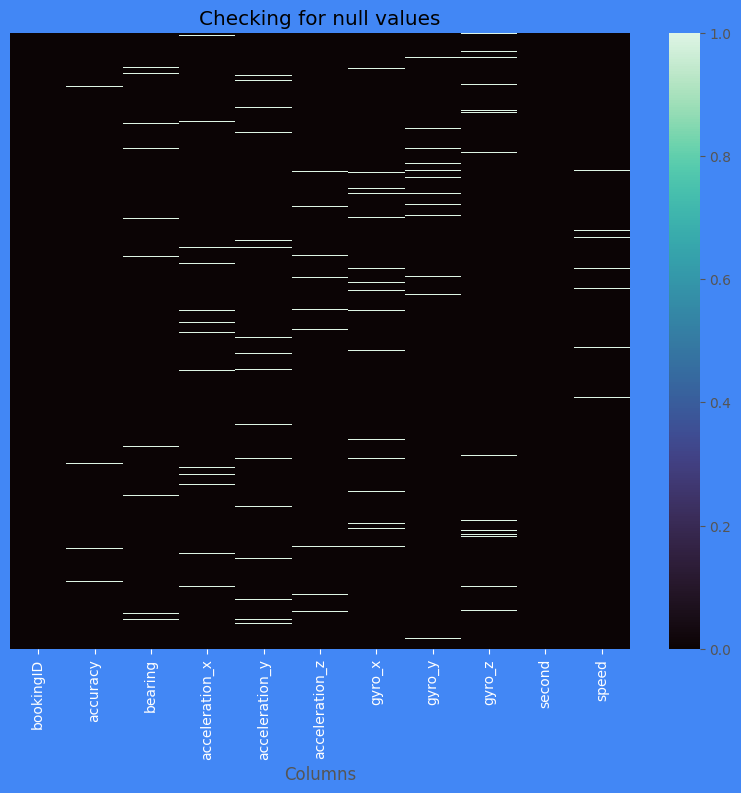

In [22]:
func.plotNull(sensors)

<u><b>Things Observed</b></u>
- For sensor dataset, majority of the null values can be seen in almost all columns

### Correlation Plot

- This helps us identify the correlation between each variable
- Tells us what we should do for the next steps

In [23]:
sensors_mat = sensors.drop('bookingID',axis=1).corr()
drivers_mat = drivers.drop('id',axis=1)[['no_of_years_driving_exp','car_model_year','rating']].corr()
arr = [sensors_mat , drivers_mat]
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Correlation for Sensors", "Correlation for Drivers"),
    shared_yaxes=False  
)


for i, matrix in enumerate(arr, start=1):
    heatmap = go.Heatmap(
        z=matrix.values,
        x=matrix.columns,
        y=matrix.columns,
        text=matrix.round(2).astype(str),
        coloraxis="coloraxis"  
    )
    fig.add_trace(heatmap, row=i, col=1)
    fig.update_traces(colorscale='Plasma')


fig.update_layout(
    title_text="Correlation Matrix for both Datasets",
    title_font=dict(size=20, color='blue'),
    height=800, width=700,  
    paper_bgcolor='#93bcf5',
    title_x=0.5,
    title_xanchor='center',
    coloraxis=dict(
        colorbar=dict(
            title="Correlation",
            titleside="right",
            tickmode="array",
            tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1],
            ticktext=["0", "0.2", "0.4", "0.6", "0.8", "1"],
            ticks="outside",
            ticklen=5,
            tickfont=dict(size=12),
        ),
    )
)

for i in range(1, 3):
    fig.update_xaxes(title_text="Features", row=i, col=1)
    fig.update_yaxes(title_text="Features", row=i, col=1)  
fig.show()


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that accelearation z and y has a moderate correlation

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Data Preprocessing - Part 2__</font>

### Create the function for imputing

**Stochastic Impute**

1. Aims to reduce the bias by an extra step of augmenting the predicted score with a residual term
2. Residual term is normally distributed with mean zero and variance equal to residual variance
3. Useful when missing values occurs at random

In [24]:
mice = IterativeImputer()
def impute_group(group):
    num_cols = group.select_dtypes(include='number').columns
    groupNums = group[num_cols]
    inputeValues = mice.fit_transform(groupNums)
    group_imputed = pd.DataFrame(inputeValues, columns=num_cols, index=group.index)

    group_imputed['bookingID'] = group['bookingID']
    return group_imputed

In [25]:
def stochastic_impute(group, column):
    Observed = group[column].dropna().values
    if len(Observed) == 0:
        return group
    randomIdx = np.random.choice(len(Observed), size=len(group))
    group[column] = group[column].fillna(pd.Series(Observed[randomIdx], index=group.index))
    return group

### Imputing missing values in speed

For speed, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [26]:
sensorNA = sensors[sensors['speed'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['speed'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsSpeed = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'speed'))
sensors = sensorsSpeed.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 111826
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `112949` null values and it is imputed here for the speed columns

### Imputing missing values in gyro-x

For gyro-x, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [27]:
sensorNA = sensors[sensors['gyro_x'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_x'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_x = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_x'))
sensors = sensorsgyro_x.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 156973
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `159548` null values and it is imputed here for the gyro-x column

### Imputing missing values in gyro-y

For gyro-y, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [28]:
sensorNA = sensors[sensors['gyro_y'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_y'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_y = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_y'))
sensors = sensorsgyro_y.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 136729
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `139239` null values and it is imputed here for the gyro-y column

### Imputing missing values in gyro-z

For gyro-z, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [29]:
sensorNA = sensors[sensors['gyro_z'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['gyro_z'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsgyro_z = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'gyro_z'))
sensors = sensorsgyro_z.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 166365
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `169702` null values and it is imputed here for the gyro-z column

### Imputing missing values in accuracy

For accuracy, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [30]:
sensorNA = sensors[sensors['accuracy'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['accuracy'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsaccuracy = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'accuracy'))
sensors = sensorsaccuracy.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 140045
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `143412` null values and it is imputed here for the gyro-z column

### Imputing missing values in bearing

For bearing, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [31]:
sensorNA = sensors[sensors['bearing'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['bearing'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsbearing = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'bearing'))
sensors = sensorsbearing.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 188877
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `191819` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_x

For acceleration_x, we will utilise the stochastic impute method as the missing values occurs at random and not fix place

In [32]:
sensorNA = sensors[sensors['acceleration_x'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_x'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_x = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_x'))
sensors = sensorsacceleration_x.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 194105
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `197800` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_y 

For acceleration_y , same will be utilise

In [33]:
sensorNA = sensors[sensors['acceleration_y'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_y'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_y = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_y'))
sensors = sensorsacceleration_y.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 210037
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `197800` null values and it is imputed here for the gyro-z column

### Imputing missing values in acceleartion_z

For acceleration_z , same will be utilise

In [34]:
sensorNA = sensors[sensors['acceleration_z'].isna()].copy()
print(f'Rows before dropping: {len(sensors)}')
sums = sensors[sensors['acceleration_z'].isna()]
print(f'Rows of null values: {len(sums)}')
sensorsacceleration_z = sensors.groupby('bookingID').apply(lambda group: stochastic_impute(group, 'acceleration_z'))
sensors = sensorsacceleration_z.reset_index(drop=True)
print(f'Rows after imputation: {len(sensors)}')

Rows before dropping: 7346552
Rows of null values: 79046
Rows after imputation: 7346552


<u><b>Things Observed</b></u>
- For sensor dataset,we can see that speed contains `80679` null values and it is imputed here for the gyro-z column

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Exploratory Data Analysis (After)__</font>

### Numeric Analyser

This is the class to define numeric analyser to analyse the numeric columns

In [35]:
class NumericAnalyser:
    def __init__(self, data):
        self.data = data

    def combined_numPlot(self, cols):
        total_rows = len(cols)
        total_cols = 2  

        fig = make_subplots(rows=1, cols=len(cols), subplot_titles=[f'Boxplot of {col}' for col in cols])

        for i, col in enumerate(cols, 1):
            fig.add_trace(
                go.Box(y=self.data[col], name=col),
                row=1, col=i
            )
        for i, annotation in enumerate(fig['layout']['annotations']):
            annotation['x'] = (i + 0.5) / len(cols)  
            annotation['xanchor'] = 'center'
        fig.update_layout(paper_bgcolor='#93bcf5')
        letters = ','.join(cols)
        fig.update_layout(title_text=f'Numerical Analysis for {letters}', title_font=dict(size=20, color='blue'), showlegend=False, height=500, width=1600,    title_x=0.5,  
    title_xanchor='center')
        fig.show()

    def ratio(self, col1, col2):
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=self.data[col1], name=col1, opacity=0.75))
        fig.add_trace(go.Histogram(x=self.data[col2], name=col2, opacity=0.75))
        fig.update_layout(title_text=f'{col1} vs {col2}', barmode='overlay')
        fig.show()

    def numTarget(self, cols, target):
        for col in cols:
            fig = px.box(self.data, x=col, y=target)
            fig.update_layout(title_text=f'Analysis on {col}')
            fig.show()

#### Sensors dataset

Here is to analyse the sensor dataset alone and gain insights of the data

In [36]:
sensorsById = sensors.groupby('bookingID').mean()
sensor_analyser = NumericAnalyser(sensorsById)
sensorsById

accuracy     bearing  acceleration_x  acceleration_y  \
bookingID                                                              
0               9.861915  177.496861       -0.717247       -9.605374   
1               3.719266  128.432225       -0.488535        9.531906   
2               3.802543  177.283951        0.287461        9.742984   
4              10.000000  149.617421       -0.381789       -9.369691   
6               4.625905  196.314563        0.566611        9.516061   
...                  ...         ...             ...             ...   
1709396983957   4.105596  169.708333        0.099609        1.932537   
1709396983960  11.859701  178.966828        0.563731       -8.711424   
1709396983966   9.394889  196.589443       -0.198373        9.059394   
1709396983971   5.212457  205.039501        0.729408        8.900565   
1709396983975  35.891304  102.548424       -0.305944       -8.989082   

               acceleration_z    gyro_x    gyro_y    gyro_z      second  \
bookingID                                                                 
0                   -1.530513  0.002107 -0.002516 -0.001293  928.942094   
1                   -2.208824 -0.000911 -0.002630  0.002682  577.751918   
2                    0.094559 -0.001310 -0.011770  0.004012  320.777778   
4                   -2.654180 -0.023809  0.023460  0.002135  541.207039   
6                    2.315766  0.006634 -0.010550  0.001775  540.685437   
...                       ...       ...       ...       ...         ...   
1709396983957        9.768531  0.031464 -0.017687 -0.005107  541.723684   
1709396983960       -4.471333 -0.013332  0.007193 -0.004392  425.289552   
1709396983966        3.336205  0.001253 -0.007052 -0.001300  584.032258   
1709396983971        3.757822  0.001885  0.001058  0.000345  524.492723   
1709396983975       -4.073100 -0.006537  0.012269 -0.000919  303.429348   

                   speed  
bookingID                 
0               9.133206  
1               7.610503  
2               2.851901  
4               6.010124  
6               4.779853  
...                  ...  
1709396983957   2.389129  
1709396983960   7.665534  
1709396983966  12.709413  
1709396983971   6.046232  
1709396983975   4.598331  

[20000 rows x 10 columns]

##### Analysing on acceleration

In [37]:
cols = [ 'acceleration_x', 'acceleration_y', 'acceleration_z']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that x is symmetrical, y is negatively skewed and z is symmetrical, all contains outliers

##### Analysing on gyro

In [38]:
cols = [ 'gyro_x', 'gyro_y', 'gyro_z']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that x is symmetrical, y is symmetrical and z is symmetrical, all contains outliers

#### Analysing on other columns

In [39]:
cols = [ 'bearing', 'accuracy', 'speed']
sensor_analyser = NumericAnalyser(sensorsById)
sensor_analyser.combined_numPlot(cols)

<u><b>Things Observed</b></u>
- For the acceleration data, we can see that bearing is symmetrical, accuracy is symmetrical and z is symmetrical, all contains outliers

### Driver

This is to analyse the driver dataset and gain insights on it

#### Analyse on the ratings of the drivers

In [40]:
fig = make_subplots(rows=2, cols=2,subplot_titles=[f"Number of Years Driving (Rating= {r})" for r in range(2, 6)],
    vertical_spacing=0.1, 
    horizontal_spacing=0.1
)

rating = 2

for row in range(1, 3): 
    for col in range(1, 3):  
        ratings = drivers[drivers['rating'] == rating]
        fig.add_trace(
            go.Histogram(x=ratings['no_of_years_driving_exp'],marker_color = '#e06960', nbinsx=20), 
            row=row, col=col
        )
        rating += 1

for i in range(2, 6):
    fig.update_yaxes(title_text="Count", row=(i+1)//3, col=((i-1)%2)+1)
    fig.update_xaxes(title_text="Years", row=(i+1)//3, col=((i-1)%2)+1)

fig.update_layout(
    title_text='Visualisation On the Ratings',
    title_font=dict(size=20, color='blue'),
    showlegend=False,
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    height=800, 
    width=1000, 
    title_x=0.5,  
    title_xanchor='center'
)

fig.show()

<u><b>Things Observed</b></u>
- For the rating 2, we can see that 15 to 16 has the highest count
- For the rating 3, we can see that 15 to 16 has the highest count
- For the rating 4, we can see that 23 to 24 has the highest count
- For the rating 5, we can see that 12 to 13 has the highest count

In [41]:
CarMakesC = drivers['car_make'].value_counts()
GenderCount = drivers['gender'].value_counts()

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Car Make', 'Gender'),
    vertical_spacing=0.15
)

fig.add_trace(
    go.Bar(
        x=CarMakesC.index,
        y=CarMakesC.values,
        text=CarMakesC.values,
        textposition='outside',
        name='Car Make',
        marker_color='blue'  
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=GenderCount.index,
        y=GenderCount.values,
        text=GenderCount.values,
        textposition='outside',
        name='Gender',
        marker_color='purple'  
    ),
    row=2, col=1
)

fig.update_layout(
    title_text='Distribution of different columns',
    title_font_size=16,     title_font=dict(size=20, color='blue'),
    showlegend=False,
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    height=1000,  
    width=900,  
    title_x=0.5,
    title_xanchor='center'
)

fig.update_xaxes(title_text='Car Make', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_xaxes(title_text='Gender', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

fig.show()

<u><b>Things Observed</b></u>
- For the car make, we can see that Toyota has the highest count and Mitsubishi has the lowest count
- For the gender, the male has a higher count than the female

### Safety Labels Dataset

In [42]:
label_counts = safety_labels['label'].value_counts()

fig = go.Figure(data=[go.Bar(x=label_counts.index, y=label_counts.values)])

fig.update_layout(
    title='Count of Labels',   
    title_font_size=16,     
    title_font=dict(size=20, color='blue'),   
     title_x=0.5,
    title_xanchor='center',
    xaxis_title='Label',
    yaxis_title='Count',
    plot_bgcolor='#a4c4f0',
    paper_bgcolor='#93bcf5',
    bargap=0.2)

fig.show()

<u><b>Things Observed</b></u>
- From the above chart, we can see that there is more 0 labels as compared to 1 label in the dataset

### Merge Dataset

Here we will continue to do data analysis with merged dataset

In [43]:
drivers = drivers.rename(columns = {'id':"driver_id"})
safety_sensor = pd.merge(sensors, safety_labels, on='bookingID')
safety_sensor_driver = pd.merge(safety_sensor, drivers, on='driver_id')
safety_sensor_driver

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0                    0       8.0  286.468414       -1.467249       -8.900690   
1                    0      16.0  236.383453       -1.051239       -8.535971   
2                    0       8.0  355.459412        0.103629       -9.544144   
3                    0      16.0  144.299423       -0.942676       -9.370532   
4                    0      16.0  144.299423       -0.636575       -9.567172   
...                ...       ...         ...             ...             ...   
7346547  1649267441736       3.9  150.000000       -0.342639        8.790235   
7346548  1649267441736       3.9  146.000000       -0.654153       10.742343   
7346549  1649267441736       4.0  112.000000        0.852298        8.922347   
7346550  1649267441736       3.9  163.000000        0.271876       10.565545   
7346551  1649267441736       3.9  135.000000        0.678335        9.663401   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  \
0             -0.949854  0.128197  0.189890 -0.152818  1172.0  15.456474   
1             -2.123114  0.068428  0.011427  0.056763   246.0   3.824497   
2             -3.158203  0.041970 -0.027644 -0.007944  1232.0   9.091736   
3             -1.716675 -0.006554 -0.011807 -0.000954    76.0   0.137619   
4             -1.228439 -0.013051 -0.030592  0.006250    78.0   0.137619   
...                 ...       ...       ...       ...     ...        ...   
7346547       -1.607132  0.001326  0.087127  0.017157   305.0  21.197744   
7346548       -3.034306 -0.042359 -0.034174 -0.026948   322.0  23.653850   
7346549       -2.832609 -0.120026  0.066898  0.015272   380.0  20.766455   
7346550       -1.723174  0.083741 -0.036792  0.043912   276.0  22.723602   
7346551       -1.859778  0.101299 -0.063408 -0.025813    28.0   4.440657   

         driver_id  label            name date_of_birth  \
0              359      0   Jemmie Cardew    1970-05-12   
1              359      0   Jemmie Cardew    1970-05-12   
2              359      0   Jemmie Cardew    1970-05-12   
3              359      0   Jemmie Cardew    1970-05-12   
4              359      0   Jemmie Cardew    1970-05-12   
...            ...    ...             ...           ...   
7346547        169      0  Marylou Yurkin    1981-12-08   
7346548        169      0  Marylou Yurkin    1981-12-08   
7346549        169      0  Marylou Yurkin    1981-12-08   
7346550        169      0  Marylou Yurkin    1981-12-08   
7346551        169      0  Marylou Yurkin    1981-12-08   

         no_of_years_driving_exp  gender       car_make  car_model_year  \
0                              9  Female  Mercedes-Benz            2003   
1                              9  Female  Mercedes-Benz            2003   
2                              9  Female  Mercedes-Benz            2003   
3                              9  Female  Mercedes-Benz            2003   
4                              9  Female  Mercedes-Benz            2003   
...                          ...     ...            ...             ...   
7346547                       21  Female           Audi            2006   
7346548                       21  Female           Audi            2006   
7346549                       21  Female           Audi            2006   
7346550                       21  Female           Audi            2006   
7346551                       21  Female           Audi            2006   

         rating  
0           5.0  
1           5.0  
2           5.0  
3           5.0  
4           5.0  
...         ...  
7346547     5.0  
7346548     5.0  
7346549     5.0  
7346550     5.0  
7346551     5.0  

[7346552 rows x 20 columns]

<u><b>Things Observed</b></u>
- Here, we can see that the dataframe are merge together already

In [48]:
fig = make_subplots(rows=3, cols=1)
for i in range(1, 3):
    fig.add_trace(
        go.Violin(x=safety_sensor_driver['label'], y=safety_sensor_driver['acceleration_z']),
        row=i, col=1
    )

fig.update_layout(
    title='Speed Distribution by Trip Type',
    xaxis_title='Trip Type (0: Normal, 1: Dangerous)',
    yaxis_title='Speed (m/s)'
)

for i in range(1, 4):
    fig.update_xaxes(title_text='Trip Type (0: Normal, 1: Dangerous)', row=i, col=1)

for i in range(1, 4):
    fig.update_yaxes(title_text='Speed (m/s)', row=i, col=1)

fig.show()

<a class="anchor" id="4"></a>
## <font color='#71a1e3'>__Feature Engineering__</font>

### Dropping of rows where speed is negative

In [39]:
print(f'Rows before dropping: {len(sensors)}')
sensors = sensors.drop(sensors[sensors['speed'] < 0].index, axis=0)
print(f'Rows after dropping: {len(sensors)}')

Rows before dropping: 7469656
Rows after dropping: 7358108


### Feature engineered a distance column

In [40]:
sensors['distance'] = sensors['second'] * sensors['speed']

### Standardizing the dataset

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['accuracy','bearing','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','second','speed']
sensorDF = sensors[columns]
standardized = scaler.fit_transform(sensorDF)
standardizedDF = pd.DataFrame(sensorDF, columns=columns)


\begin{align*}
\text{Mean Speed By Booking ID} &=  Mean(\text{Speed})
\end{align*}



In [42]:
sensors['median_speed'] = sensors.groupby('bookingID')['speed'].transform('median')
sensors['mean_speed'] = sensors.groupby('bookingID')['speed'].transform('mean')
sensors['std_speed'] = sensors.groupby('bookingID')['speed'].transform('std')
sensors['max_speed'] = sensors.groupby('bookingID')['speed'].transform('max')
sensors

bookingID  accuracy     bearing  acceleration_x  acceleration_y  \
0                    0       8.0  286.468414       -1.467249       -8.900690   
1                    0      16.0  236.383453       -1.051239       -8.535971   
2                    0       8.0  355.459412        0.103629       -9.544144   
3                    0      16.0  144.299423       -0.942676       -9.370532   
4                    0      16.0  144.299423       -0.636575       -9.567172   
...                ...       ...         ...             ...             ...   
7469651  1709396983975      32.0  122.888580       -0.528311       -9.030188   
7469652  1709396983975       6.0   24.368900       -0.225949       -8.891718   
7469653  1709396983975      12.0  198.527954        0.179144       -8.934634   
7469654  1709396983975      32.0  114.740768        1.481604             NaN   
7469655  1709396983975       6.0   24.368900       -0.345129       -9.047833   

         acceleration_z    gyro_x    gyro_y    gyro_z  second      speed  \
0             -0.949854  0.128197  0.189890 -0.152818  1172.0  15.456474   
1             -2.123114  0.068428  0.011427  0.056763   246.0   3.824497   
2             -3.158203  0.041970 -0.086095 -0.007944  1232.0   9.091736   
3             -1.716675 -0.006554 -0.011807 -0.000954    76.0   0.137619   
4             -1.228439 -0.013051 -0.030592  0.006250    78.0   0.137619   
...                 ...       ...       ...       ...     ...        ...   
7469651       -4.752707 -0.011474  0.014938 -0.037461    95.0   5.638845   
7469652       -3.861621 -0.012920  0.011622 -0.000163   380.0   2.954595   
7469653       -4.572067 -0.015760 -0.018210 -0.006609   554.0   1.035811   
7469654       -2.629593 -0.017021 -0.035980  0.154519   299.0   3.540994   
7469655       -3.934744  0.001009  0.019218 -0.011708   355.0   2.954595   

             distance  median_speed  mean_speed  std_speed  max_speed  
0        18114.987885      8.985457    9.205338   7.078551  22.882523  
1          940.826317      8.985457    9.205338   7.078551  22.882523  
2        11201.018555      8.985457    9.205338   7.078551  22.882523  
3           10.459033      8.985457    9.205338   7.078551  22.882523  
4           10.734271      8.985457    9.205338   7.078551  22.882523  
...               ...           ...         ...        ...        ...  
7469651    535.690317      2.960753    5.518250   4.290220  16.633823  
7469652   1122.746224      2.960753    5.518250   4.290220  16.633823  
7469653    573.839397      2.960753    5.518250   4.290220  16.633823  
7469654   1058.757327      2.960753    5.518250   4.290220  16.633823  
7469655   1048.881341      2.960753    5.518250   4.290220  16.633823  

[7358108 rows x 16 columns]

In [43]:
total_duration_by_booking = sensors.groupby('bookingID')['second'].max().reset_index()
total_duration_by_booking.rename(columns={'second': 'total_duration'}, inplace=True)
print(total_duration_by_booking)

           bookingID  total_duration
0                  0          1589.0
1                  1          1034.0
2                  2           822.0
3                  4          1092.0
4                  6          1092.0
...              ...             ...
19967  1709396983957          1044.0
19968  1709396983960           809.0
19969  1709396983966           988.0
19970  1709396983971          1076.0
19971  1709396983975           556.0

[19972 rows x 2 columns]


In [44]:
sensors = pd.merge(total_duration_by_booking, sensors, on='bookingID')

In [ ]:
sensors['total_duration'] = sensors['total_duration'] / 60

In [ ]:
drivers = drivers.rename(columns = {'id':"driver_id"})
drivers

driver_id                 name date_of_birth  no_of_years_driving_exp  \
0            1  Sinclair Birmingham    1982-10-17                       10   
1            2        Juline Faulks    1977-11-30                       14   
2            3        Germayne Stit    1976-09-18                       13   
3            4       Athena Coudray    1982-10-24                       16   
4            5   Batholomew Hiscoke    1978-09-11                       20   
..         ...                  ...           ...                      ...   
495        496  Mariquilla Tilmouth    1979-12-31                       10   
496        497       Analiese Acedo    1978-11-10                        6   
497        498        Gale Bewfield    1974-11-05                        8   
498        499         Shalom Okroy    1978-10-17                        9   
499        500     Farleigh Aughtie    1979-07-24                       21   

     gender       car_make  car_model_year  rating  
0      Male           Audi            2010     4.0  
1    Female            BMW            2000     3.0  
2      Male  Mercedes-Benz            1999     4.0  
3    Female          Lexus            2009     2.0  
4      Male            BMW            2012     3.0  
..      ...            ...             ...     ...  
495  Female     Mitsubishi            1988     2.0  
496  Female          Mazda            2000     5.0  
497  Female            BMW            1993     5.0  
498    Male  Mercedes-Benz            2010     4.0  
499    Male     Volkswagen            2011     5.0  

[500 rows x 8 columns]

In [ ]:
current_year = datetime.now().year
drivers['date_of_birth'] = pd.to_datetime(drivers['date_of_birth'])
drivers['age'] = current_year - drivers['date_of_birth'].dt.year
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
drivers['age_bin'] = est.fit_transform(drivers[['age']])
print(drivers[['driver_id', 'age', 'age_bin']])
print("Bin edges: ", est.bin_edges_[0])
labels = ['low', 'mid-low','mid', 'mid-high', 'high'] 
drivers['age_category'] = pd.cut(drivers['age'], bins=5, labels=labels, right=False)
drivers

     driver_id  age  age_bin
0            1   41      0.0
1            2   46      1.0
2            3   47      2.0
3            4   41      0.0
4            5   45      1.0
..         ...  ...      ...
495        496   44      1.0
496        497   45      1.0
497        498   49      2.0
498        499   45      1.0
499        500   44      1.0

[500 rows x 3 columns]
Bin edges:  [41. 44. 47. 50. 53.]


driver_id                 name date_of_birth  no_of_years_driving_exp  \
0            1  Sinclair Birmingham    1982-10-17                       10   
1            2        Juline Faulks    1977-11-30                       14   
2            3        Germayne Stit    1976-09-18                       13   
3            4       Athena Coudray    1982-10-24                       16   
4            5   Batholomew Hiscoke    1978-09-11                       20   
..         ...                  ...           ...                      ...   
495        496  Mariquilla Tilmouth    1979-12-31                       10   
496        497       Analiese Acedo    1978-11-10                        6   
497        498        Gale Bewfield    1974-11-05                        8   
498        499         Shalom Okroy    1978-10-17                        9   
499        500     Farleigh Aughtie    1979-07-24                       21   

     gender       car_make  car_model_year  rating  age  age_bin age_category  
0      Male           Audi            2010     4.0   41      0.0          low  
1    Female            BMW            2000     3.0   46      1.0          mid  
2      Male  Mercedes-Benz            1999     4.0   47      2.0          mid  
3    Female          Lexus            2009     2.0   41      0.0          low  
4      Male            BMW            2012     3.0   45      1.0      mid-low  
..      ...            ...             ...     ...  ...      ...          ...  
495  Female     Mitsubishi            1988     2.0   44      1.0      mid-low  
496  Female          Mazda            2000     5.0   45      1.0      mid-low  
497  Female            BMW            1993     5.0   49      2.0     mid-high  
498    Male  Mercedes-Benz            2010     4.0   45      1.0      mid-low  
499    Male     Volkswagen            2011     5.0   44      1.0      mid-low  

[500 rows x 11 columns]

In [ ]:
import pandas as pd
import numpy as np
from math import atan2, degrees

In [ ]:
def calculate_pitch(acceleration_y, acceleration_z):
    return degrees(atan2(acceleration_y, acceleration_z))

def calculate_roll(acceleration_x, acceleration_z):
    return degrees(atan2(acceleration_x, acceleration_z))

def calculate_yaw(gyro_z):
    return degrees(gyro_z)

In [ ]:
sensors['pitch'] = sensors.apply(lambda x: calculate_pitch(x['acceleration_y'], x['acceleration_z']), axis=1)
sensors['roll'] = sensors.apply(lambda x: calculate_roll(x['acceleration_x'], x['acceleration_z']), axis=1)
sensors['yaw'] = sensors['gyro_z'].apply(calculate_yaw)

In [ ]:
sensors

bookingID  total_duration  accuracy     bearing  acceleration_x  \
0                    0       26.483333       8.0  286.468414       -1.467249   
1                    0       26.483333      16.0  236.383453       -1.051239   
2                    0       26.483333       8.0  355.459412        0.103629   
3                    0       26.483333      16.0  144.299423       -0.942676   
4                    0       26.483333      16.0  144.299423       -0.636575   
...                ...             ...       ...         ...             ...   
7358084  1709396983975        9.266667      32.0  122.888580       -0.528311   
7358085  1709396983975        9.266667       6.0   24.368900       -0.225949   
7358086  1709396983975        9.266667      32.0  198.527954        0.179144   
7358087  1709396983975        9.266667      32.0  114.740768        1.481604   
7358088  1709396983975        9.266667       6.0   24.368900       -0.345129   

         acceleration_y  acceleration_z    gyro_x    gyro_y    gyro_z  second  \
0             -8.900690       -0.949854  0.128197  0.189890 -0.152818  1172.0   
1             -8.535971       -2.123114  0.068428  0.011427  0.056763   246.0   
2             -9.544144       -3.158203  0.041970  0.066879 -0.007944  1232.0   
3             -9.370532       -1.716675 -0.006554 -0.011807 -0.000954    76.0   
4             -9.567172       -1.228439 -0.013051 -0.030592  0.006250    78.0   
...                 ...             ...       ...       ...       ...     ...   
7358084       -9.030188       -4.752707 -0.011474  0.014938 -0.037461    95.0   
7358085       -8.891718       -3.861621 -0.012920  0.011622 -0.000163   380.0   
7358086       -8.934634       -4.572067 -0.015760 -0.018210 -0.006609   554.0   
7358087             NaN       -2.629593 -0.017021  0.350044  0.154519   299.0   
7358088       -9.047833       -3.934744  0.001009  0.019218 -0.011708   355.0   

             speed      distance  median_speed  mean_speed  std_speed  \
0        15.456474  18114.987885      8.902016    9.175429   7.065549   
1         3.824497    940.826317      8.902016    9.175429   7.065549   
2         9.091736  11201.018555      8.902016    9.175429   7.065549   
3         0.137619     10.459033      8.902016    9.175429   7.065549   
4         0.137619     10.734271      8.902016    9.175429   7.065549   
...            ...           ...           ...         ...        ...   
7358084   5.638845    535.690317      2.960753    5.572189   4.317351   
7358085   2.954595   1122.746224      2.960753    5.572189   4.317351   
7358086   1.035811    573.839397      2.960753    5.572189   4.317351   
7358087   3.540994   1058.757327      2.960753    5.572189   4.317351   
7358088   2.954595   1048.881341      2.960753    5.572189   4.317351   

         max_speed       pitch        roll       yaw  
0        22.882523  -96.091371 -122.917831 -8.755844  
1        22.882523 -103.967497 -153.658140  3.252274  
2        22.882523 -108.309628  178.120657 -0.455139  
3        22.882523 -100.381427 -151.227538 -0.054688  
4        22.882523  -97.316829 -152.606881  0.358078  
...            ...         ...         ...       ...  
7358084  16.633823 -117.758423 -173.657038 -2.146347  
7358085  16.633823 -113.475025 -176.651358 -0.009354  
7358086  16.633823 -117.099918  177.756165 -0.378647  
7358087  16.633823         NaN  150.601578  8.853271  
7358088  16.633823 -113.503379 -174.987227 -0.670822  

[7358089 rows x 20 columns]

In [ ]:
sensors.isnull().sum()

bookingID              0
total_duration         0
accuracy               0
bearing                0
acceleration_x         0
acceleration_y    210705
acceleration_z     79442
gyro_x                 0
gyro_y                 0
gyro_z                 0
second               602
speed                  0
distance             602
median_speed           0
mean_speed             0
std_speed              0
max_speed              0
pitch             287744
roll               79442
yaw                    0
dtype: int64